# Gradient-Boosting Tree Algorithm Implementation:

## Importing neccessary libraries:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.validation import check_X_y, check_array
from sklearn.datasets import make_regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing the model:

In [2]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.init_pred = None
    
    def fit(self, X, y):
        # Validate input data
        X, y = check_X_y(X, y, accept_sparse=False, ensure_2d=True, dtype="numeric")

        # Initialize the initial prediction and residuals
        self.init_pred = np.mean(y)
        residuals = y - self.init_pred
        
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            
            # Update residuals
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions
    
    def predict(self, X):
        # Validate input features
        X = check_array(X, accept_sparse=False, ensure_2d=True, dtype="numeric")

        pred = np.full(X.shape[0], self.init_pred)
        for tree in self.models:
            pred += self.learning_rate * tree.predict(X)
        return pred

## Generate synthetic data to test our model:

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train and evaluate the custom GBT model

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
# Calculate metrics

mse_syntheticdata = mean_squared_error(y_test, y_pred)
rmse_syntheticdata = np.sqrt(mse_syntheticdata)
r2_syntheticdata = r2_score(y_test, y_pred)

print("\nOur Model Performance Metrics:")
print(f"Mean Squared Error: {mse_syntheticdata:.4f}")
print(f"Root Mean Squared Error: {rmse_syntheticdata:.4f}")
print(f"R² Score: {r2_syntheticdata:.4f}")


Our Model Performance Metrics:
Mean Squared Error: 1241.2099
Root Mean Squared Error: 35.2308
R² Score: 0.9264


In [6]:
# Training data evaluation
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

In [7]:
# Test data evaluation
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MSE: {train_mse}, R²: {train_r2}")
print(f"Test MSE: {test_mse}, R²: {test_r2}")

Training MSE: 212.38539425161392, R²: 0.9879246211006136
Test MSE: 1241.2098554537713, R²: 0.9264299466362237


In [8]:
# Usage example with parameters

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Predictions:")
print(predictions)

Predictions:
[  29.48906346   36.9216731   -19.37514361 -259.50640723   -2.12484735
   40.18260943 -123.18217023  -49.08562482   -8.0811945   153.96026906
 -289.31365925  -34.60550952   29.49591411  -67.42849359  113.92774729
 -185.82429494  -72.37995091   21.64443157   75.36097169  -84.62817726
   59.29786989  163.48642782  138.16876567  -83.78044675  198.83658302
  -94.14293    -231.65379507  208.60455873   76.07292955  204.07559435
  217.23143014 -138.67416255  -32.21750366   53.81069493  -56.22536795
 -130.17821506   14.51100457  -36.5078592    19.56953629  -85.65606779
   46.3974831     0.55877444   16.19707942   48.435049    -96.71374752
   14.31609851  -82.24267635  -87.56453219  100.81884976 -121.89127985
  -18.2163302   168.38450254  213.89280621  -49.98653387  -53.12890599
  -96.69095003   90.38970453   57.12320302   41.2146445    -2.31738456
  -91.77131159  -11.55158004  -24.14369275 -115.72071005  126.76601504
  113.84331093  203.94704697   45.16564366  107.82054086   50.22

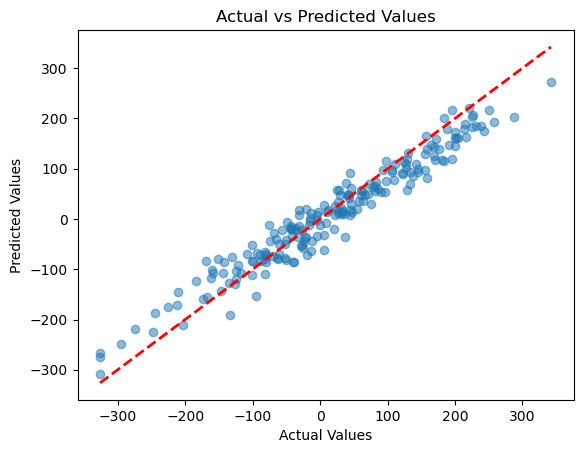

In [9]:
# Plot 1: Actual vs Predicted Values

plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

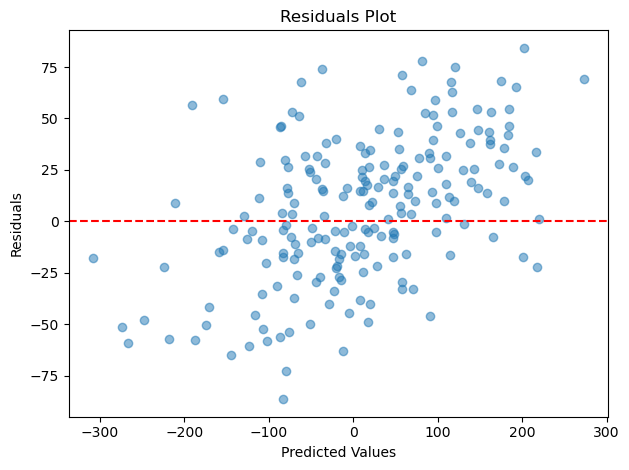

In [10]:
# Plot 2: Residuals Plot

residuals = y_test - y_pred
plt.subplot(1, 1, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

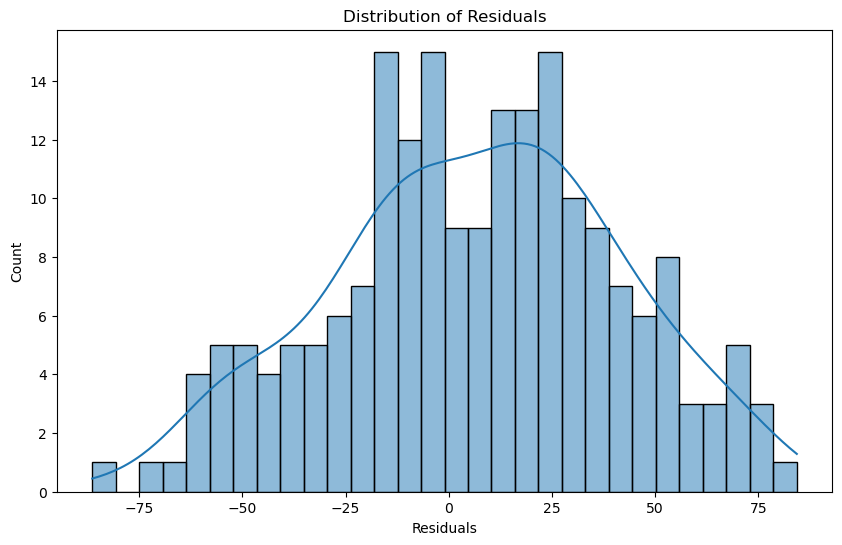

In [11]:
# Plot 3: Distribution of Residuals

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

## Load and prepare the California Housing dataset to test our model:

In [12]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

print("Dataset Information:")
print("Features:", housing.feature_names)
print("Shape:", X.shape)
print("Target Variable: Median House Value")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train the model
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse_housingdata = mean_squared_error(y_test, y_pred)
rmse_housingdata = np.sqrt(mse_housingdata)
r2_housingdata = r2_score(y_test, y_pred)

Dataset Information:
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape: (20640, 8)
Target Variable: Median House Value


In [13]:
print("\nOur Model Performance Metrics:")
print(f"Mean Squared Error: {mse_housingdata:.4f}")
print(f"Root Mean Squared Error: {rmse_housingdata:.4f}")
print(f"R² Score: {r2_housingdata:.4f}")


Our Model Performance Metrics:
Mean Squared Error: 0.2375
Root Mean Squared Error: 0.4874
R² Score: 0.8187


Text(0.5, 1.0, 'Actual vs Predicted House Values')

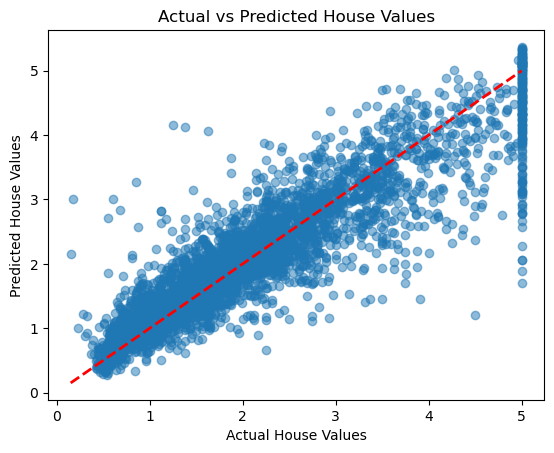

In [14]:
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')

Text(0.5, 1.0, 'Residuals vs Predicted Values')

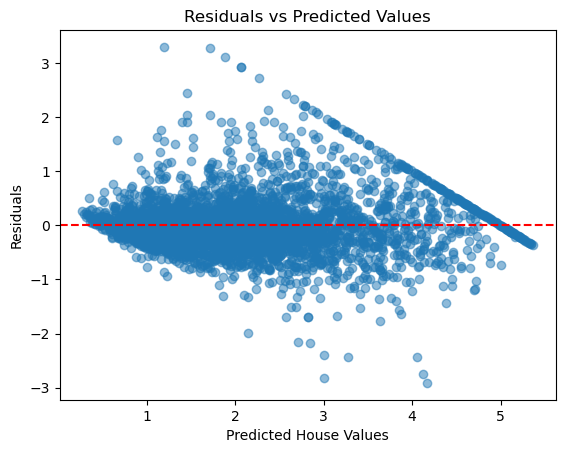

In [15]:
residuals = y_test - y_pred
plt.subplot(1, 1, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted House Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

Text(0.5, 1.0, 'Distribution of Residuals')

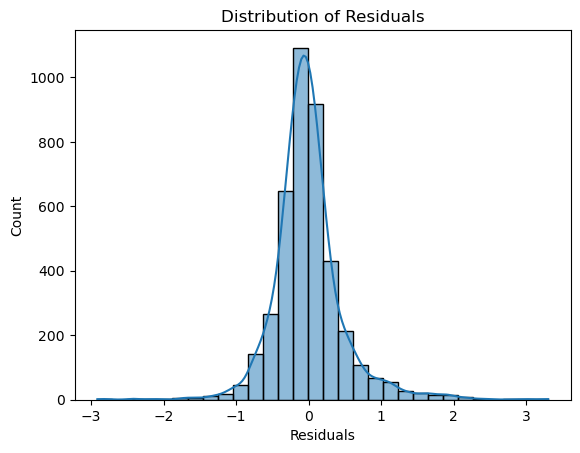

In [16]:
plt.subplot(1, 1, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

## 4. Feature Importance Plot:

In [17]:
feature_importance = np.zeros(X.shape[1])
for tree in model.models:
    feature_importance += tree.feature_importances_
feature_importance /= len(model.models)

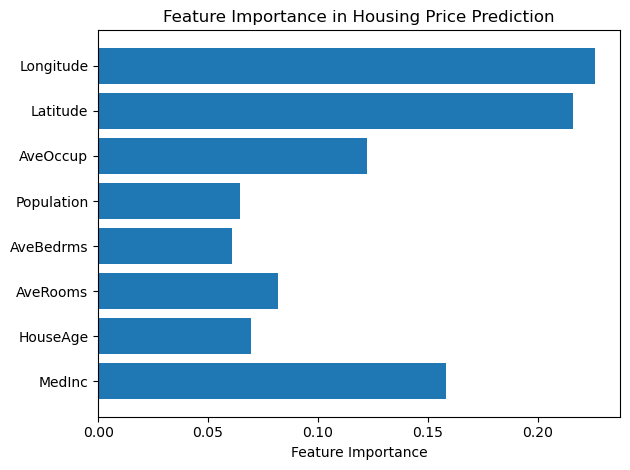

In [18]:
plt.subplot(1, 1, 1)
plt.barh(range(len(housing.feature_names)), feature_importance)
plt.yticks(range(len(housing.feature_names)), housing.feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Housing Price Prediction')

plt.tight_layout()
plt.show()

## Cross-validation analysis:
### Comparing with sklearn's implementation

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as SklearnGBR

In [20]:
sklearn_model = SklearnGBR(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
cv_scores = cross_val_score(sklearn_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

In [21]:
print("\nCross-validation Results (RMSE):")
print(f"Mean RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")


Cross-validation Results (RMSE):
Mean RMSE: 0.6518 (+/- 0.1434)
